# 2021 New York City Ballot Measures Analysis

This notebook analyzes the 2021 ballot measure results and breaks down each proposal's voter share.

### Part 1: Identify and clean the column names

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In this section we will open up the csv and format our dataframe and isolate the relevant columns

In [2]:
election_results = pd.read_csv("../data/2021_election_results.csv",
                              dtype = {"ad":"str", "ed": "str", "candidate":"str"})

Check the dtypes and make sure it is formatted properly

In [3]:
election_results.dtypes

office       object
id            int64
ad           object
ed           object
candidate    object
party        object
votes         int64
dtype: object

In [4]:
election_results.head()

,office,id,ad,ed,candidate,party,votes
0,Mayor,23376,23,1,Eric L. Adams,Democratic,106
1,Mayor,23376,23,1,Curtis A. Sliwa,Republican,444
2,Mayor,23376,23,1,William A. Pepitone,Conservative,44
3,Mayor,23376,23,1,Catherine Rojas,Socialism &amp; Lib,4
4,Mayor,23376,23,1,Stacey H. Prussman,Libertarian,2


Filter the `office` column to only display results for the proposals

In [5]:
ballot = election_results[election_results['office'].str.contains('Proposal Number', case=False)].copy()
print(ballot)
len(ballot)

                                                   office     id  ad   ed  \
294547  Proposal Number 1, an Amendment: Amending the ...  24566  23    1   
294548  Proposal Number 1, an Amendment: Amending the ...  24566  23    1   
294549  Proposal Number 1, an Amendment: Amending the ...  24566  23    2   
294550  Proposal Number 1, an Amendment: Amending the ...  24566  23    2   
294551  Proposal Number 1, an Amendment: Amending the ...  24566  23    3   
...                                                   ...    ...  ..  ...   
353552  Proposal Number 5, an Amendment: Increasing th...  24570  87  100   
353553  Proposal Number 5, an Amendment: Increasing th...  24570  87  101   
353554  Proposal Number 5, an Amendment: Increasing th...  24570  87  101   
353555  Proposal Number 5, an Amendment: Increasing th...  24570  87  102   
353556  Proposal Number 5, an Amendment: Increasing th...  24570  87  102   

       candidate party  votes  
294547       YES   NaN    112  
294548     

59010

Reset the index to put it back into a readable table

In [6]:
ballot = ballot.reset_index(drop=True)
ballot.head()

,office,id,ad,ed,candidate,party,votes
0,"Proposal Number 1, an Amendment: Amending the ...",24566,23,1,YES,NaN,112
1,"Proposal Number 1, an Amendment: Amending the ...",24566,23,1,NO,NaN,481
2,"Proposal Number 1, an Amendment: Amending the ...",24566,23,2,YES,NaN,118
3,"Proposal Number 1, an Amendment: Amending the ...",24566,23,2,NO,NaN,495
4,"Proposal Number 1, an Amendment: Amending the ...",24566,23,3,YES,NaN,75


Let's look at all of the isolated proposals

In [7]:
ballot['office'].value_counts()

office
Proposal Number 1, an Amendment: Amending the Apportionment and Redistricting Process            11802
Proposal Number 2, an Amendment: Right to Clean Air, Clean Water, and a Healthful Environment    11802
Proposal Number 3, an Amendment: Eliminating Ten-Day-Advance Voter Registration Requirement      11802
Proposal Number 4, an Amendment: Authorizing No-Excuse Absentee Ballot Voting                    11802
Proposal Number 5, an Amendment: Increasing the Jurisdiction of the New York City Civil Court    11802
Name: count, dtype: int64

The next cell simplifies the proposal names:
*  Splits the proposal name into two columns
*  Concatenates the two values without ", an Amendment" for readability
*  Creates a `proposal_name_dw` column with the simplified name for Datawrapper

In [8]:

ballot["proposal_number_name"] = ballot["office"].str.extract(r"(Proposal Number \d+)")

ballot["after_colon"] = ballot["office"].str.split(":", n=1).str[1].str.strip()

ballot["proposal_name_dw"] = ballot["proposal_number_name"] + ": " + ballot["after_colon"]
print(ballot["proposal_name_dw"])

0        Proposal Number 1: Amending the Apportionment ...
1        Proposal Number 1: Amending the Apportionment ...
2        Proposal Number 1: Amending the Apportionment ...
3        Proposal Number 1: Amending the Apportionment ...
4        Proposal Number 1: Amending the Apportionment ...
                               ...                        
59005    Proposal Number 5: Increasing the Jurisdiction...
59006    Proposal Number 5: Increasing the Jurisdiction...
59007    Proposal Number 5: Increasing the Jurisdiction...
59008    Proposal Number 5: Increasing the Jurisdiction...
59009    Proposal Number 5: Increasing the Jurisdiction...
Name: proposal_name_dw, Length: 59010, dtype: object


<!-- Create a column for the each ballot proposal by extracting all proposals from the office column. -->

### Part 2: Calculate the total votes

Tally up the total number of yes and no votes for ballot proposal.

In [9]:
ballot_results = (
    ballot.groupby(["proposal_name_dw", "candidate"], as_index=False)["votes"].sum()
)
print(ballot_results)


                                    proposal_name_dw candidate   votes
0  Proposal Number 1: Amending the Apportionment ...        NO  309648
1  Proposal Number 1: Amending the Apportionment ...       YES  490828
2  Proposal Number 2: Right to Clean Air, Clean W...        NO  147044
3  Proposal Number 2: Right to Clean Air, Clean W...       YES  675675
4  Proposal Number 3: Eliminating Ten-Day-Advance...        NO  324744
5  Proposal Number 3: Eliminating Ten-Day-Advance...       YES  493901
6  Proposal Number 4: Authorizing No-Excuse Absen...        NO  335221
7  Proposal Number 4: Authorizing No-Excuse Absen...       YES  479254
8  Proposal Number 5: Increasing the Jurisdiction...        NO  178011
9  Proposal Number 5: Increasing the Jurisdiction...       YES  619822


Use the pivot function to reset the dataframe so you can prep it for percentage calculations

In [10]:
ballot_summary = ballot_results.pivot(index="proposal_name_dw", columns="candidate", values="votes").fillna(0).reset_index()
print(ballot_summary)


candidate                                   proposal_name_dw      NO     YES
0          Proposal Number 1: Amending the Apportionment ...  309648  490828
1          Proposal Number 2: Right to Clean Air, Clean W...  147044  675675
2          Proposal Number 3: Eliminating Ten-Day-Advance...  324744  493901
3          Proposal Number 4: Authorizing No-Excuse Absen...  335221  479254
4          Proposal Number 5: Increasing the Jurisdiction...  178011  619822


Rename the columns so they are lower case and consistent with other column names.

In [11]:
ballot_summary = ballot_summary.rename(columns={"YES": "yes", "NO": "no"})


Create a `total_votes` column with the total votes for each proposal

In [12]:
ballot_summary["total_votes"] = (ballot_summary["yes"] + (ballot_summary["no"]))
print(ballot_summary[["proposal_name_dw", "total_votes"]])

candidate                                   proposal_name_dw  total_votes
0          Proposal Number 1: Amending the Apportionment ...       800476
1          Proposal Number 2: Right to Clean Air, Clean W...       822719
2          Proposal Number 3: Eliminating Ten-Day-Advance...       818645
3          Proposal Number 4: Authorizing No-Excuse Absen...       814475
4          Proposal Number 5: Increasing the Jurisdiction...       797833


The next cell preps our dataframe for a bar chart by:
* Creating another simplified `proposal_number` column that is readable for a bar chart
* Creating another dataframe that only shows the proposal number and total number of votes

In [13]:
ballot_summary["proposal_number"] = ballot_summary["proposal_name_dw"].str.extract(r"Proposal Number (\d+)")

total_votes_per_proposal = (
    ballot_summary.groupby("proposal_number")["total_votes"]
    .sum()
    .reset_index()
)
print(total_votes_per_proposal)


  proposal_number  total_votes
0               1       800476
1               2       822719
2               3       818645
3               4       814475
4               5       797833


Plot the bar chart to see the proposal number and total votes. 

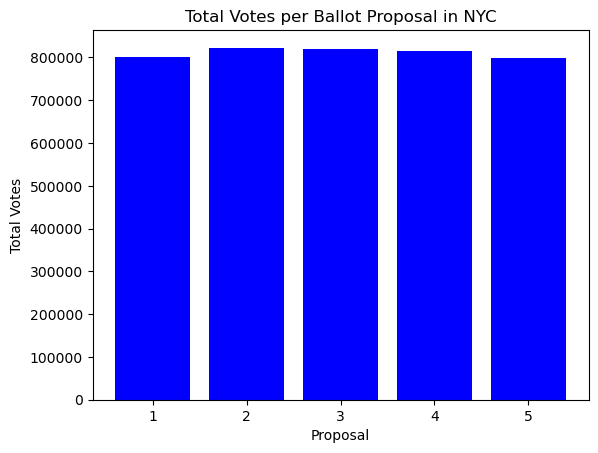

In [15]:
plt.bar(ballot_summary["proposal_number"], ballot_summary["total_votes"], color='blue')
plt.xlabel("Proposal")
plt.ylabel("Total Votes")
plt.title("Total Votes per Ballot Proposal in NYC")
plt.show()

### Part 3: Calculate the vote share for each proposal

The next cell:
* Creates a `yes_pct` and `no_pct` column
* Calculates the percentage by dividing the yes and no vote share by the total votes and multiplying it by 100.

In [16]:
ballot_summary["yes_pct"] = (ballot_summary["yes"] / (ballot_summary["yes"] + ballot_summary["no"])) * 100
ballot_summary["no_pct"] = (ballot_summary["no"] / (ballot_summary["yes"] + ballot_summary["no"])) * 100

print(ballot_summary[["proposal_name_dw", "yes", "no", "yes_pct", "no_pct"]])


candidate                                   proposal_name_dw     yes      no  \
0          Proposal Number 1: Amending the Apportionment ...  490828  309648   
1          Proposal Number 2: Right to Clean Air, Clean W...  675675  147044   
2          Proposal Number 3: Eliminating Ten-Day-Advance...  493901  324744   
3          Proposal Number 4: Authorizing No-Excuse Absen...  479254  335221   
4          Proposal Number 5: Increasing the Jurisdiction...  619822  178011   

candidate    yes_pct     no_pct  
0          61.317016  38.682984  
1          82.127069  17.872931  
2          60.331523  39.668477  
3          58.842076  41.157924  
4          77.688188  22.311812  


Round the percentages to the nearest tenth decimal place

In [17]:
ballot_summary["yes_pct"] = ballot_summary["yes_pct"].round(1)
ballot_summary["no_pct"] = ballot_summary["no_pct"].round(1)

In [18]:
ballot_summary.head()

candidate,proposal_name_dw,no,yes,total_votes,proposal_number,yes_pct,no_pct
0,Proposal Number 1: Amending the Apportionment ...,309648,490828,800476,1,61.3,38.7
1,"Proposal Number 2: Right to Clean Air, Clean W...",147044,675675,822719,2,82.1,17.9
2,Proposal Number 3: Eliminating Ten-Day-Advance...,324744,493901,818645,3,60.3,39.7
3,Proposal Number 4: Authorizing No-Excuse Absen...,335221,479254,814475,4,58.8,41.2
4,Proposal Number 5: Increasing the Jurisdiction...,178011,619822,797833,5,77.7,22.3


Drop the yes, no, and total votes column so it can be ready for Datawrapper

In [19]:
ballot_summary = ballot_summary.drop(['no', 'yes', 'total_votes'], axis=1)
print(ballot_summary)

candidate                                   proposal_name_dw proposal_number  \
0          Proposal Number 1: Amending the Apportionment ...               1   
1          Proposal Number 2: Right to Clean Air, Clean W...               2   
2          Proposal Number 3: Eliminating Ten-Day-Advance...               3   
3          Proposal Number 4: Authorizing No-Excuse Absen...               4   
4          Proposal Number 5: Increasing the Jurisdiction...               5   

candidate  yes_pct  no_pct  
0             61.3    38.7  
1             82.1    17.9  
2             60.3    39.7  
3             58.8    41.2  
4             77.7    22.3  


Export!

In [20]:
ballot_summary.to_csv("../output/2021_ballot_vote_share_assignment_1.csv", index=False)
